100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.21it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


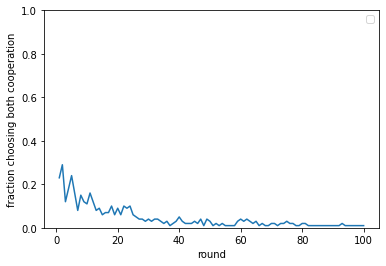

In [23]:
import matplotlib.pyplot as plt
import pyibl
from tqdm import tqdm

DECAY = 0.5
DEFAULT_UTILITY = 30
NOISE = 0.25
PARTICIPANTS = 100
ROUNDS = 100

def run(rounds, participants):
    cooperation = [0] * rounds
    aOne = pyibl.Agent(default_utility=DEFAULT_UTILITY, noise=NOISE, decay=DECAY)
    aTwo = pyibl.Agent(default_utility=DEFAULT_UTILITY, noise=NOISE, decay=DECAY)
    for p in tqdm(range(participants)):
        aOne.reset()
        aTwo.reset()
        for r in range(rounds):
            cOne = aOne.choose("C", "D")
            cTwo = aTwo.choose("C", "D")
            if cOne == "C":
                if cTwo == "C":
                    aOne.respond(1)
                    aTwo.respond(1)
                    cooperation[r] += 1
                else:
                    aOne.respond(-10)
                    aTwo.respond(10)
            else:
                if cTwo == "C":
                    aOne.respond(10)
                    aTwo.respond(-10)
                else:
                    aOne.respond(-1)
                    aTwo.respond(-1)
    return [ n / participants for n in cooperation]

def main():
    plt.plot(range(1, ROUNDS + 1), run(ROUNDS, PARTICIPANTS))
    plt.ylim([0, 1])
    plt.ylabel("fraction choosing both cooperation")
    plt.xlabel("round")
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()